# README

This jupyter notebook is about PCA and KNN. The first part of the PCA section is more of an introductory tutorial. The second part of the PCA section and the KNN section is where you should write your code, which is indicated with a ToDo tag.


**Submission:** The jupyter notebook that you submit must contain the cell output (including plots!) from a clean execution (restart kernel and run all cells sequentially).

# Principal Component Analysis (PCA) - 15 points
In this part, you will use PCA as a feature extraction algorithm to reduce  the dimensionality of an image dataset. 



## Dataset

We use *Labeled Faces in the Wild* dataset, consisting of gray-scale headshots of celebrities and politicians.
We only consider persons from the dataset with at least 100 images. 

In [1]:
# Import required packages
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn import datasets
import numpy as np


# Load data
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)
_, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names

###
print ('Number of samples:', X.shape[0])
print('Number of features:', X.shape[1])
print('Classes:', np.unique(y))
print ("\nPeople:", target_names)

Number of samples: 1140
Number of features: 2914
Classes: [0 1 2 3 4]

People: ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


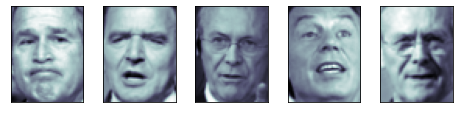

In [2]:
def plotFace(inputX, n_faces):
  fig = plt.figure(figsize=(8, 6))
  for i in range(n_faces):
      ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
      ax.imshow(np.reshape(inputX[i,:], [h,w]), cmap=plt.cm.bone)      

plotFace(X, 5)

Let's divide the data into a training set and a test set with a $7:3$ ratio. Be careful to only fit your models on the training set throughout this problem.

In [3]:
# split into train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print( 'Number of training samples:', X_train.shape[0])
print( 'Number of testing samples:', X_test.shape[0])

Number of training samples: 798
Number of testing samples: 342


## Scikit-Learn PCA

### Fit a PCA model

Here, we use the PCA model from scikit-learn with 100 components.

shape of principal components: (100, 2914)


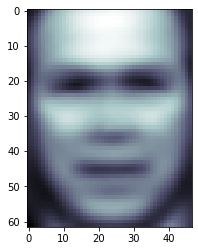

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100, whiten=True)
pca.fit(X_train)
print("shape of principal components:", pca.components_.shape)
plt.imshow(pca.mean_.reshape([h,w]), cmap=plt.cm.bone);

Let's plot the top 10 most significant eigenfaces:

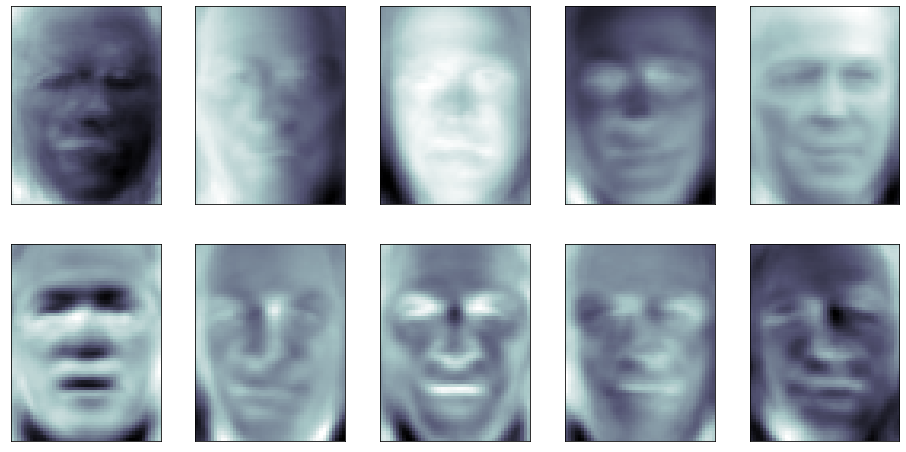

In [5]:
fig = plt.figure(figsize=(16, 8))
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape([h,w]), cmap=plt.cm.bone)

And now, the top 10 least significant eigenfaces:

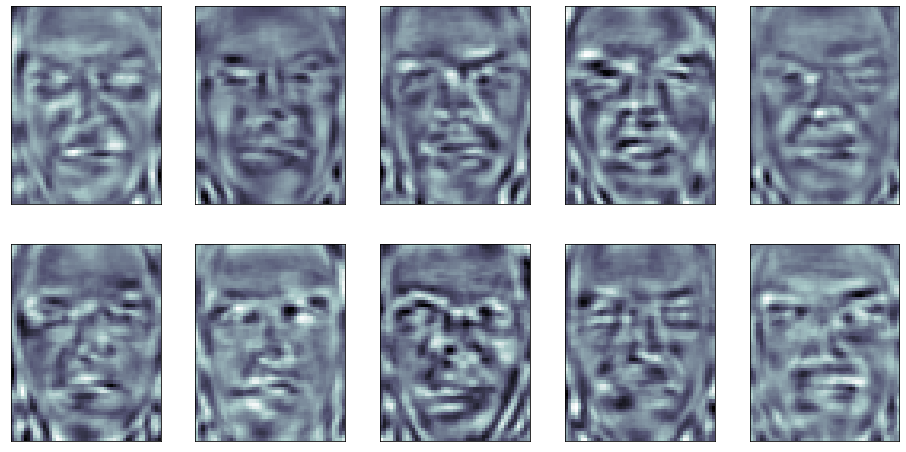

In [6]:
fig = plt.figure(figsize=(16, 8))
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i + 90].reshape([h,w]), cmap=plt.cm.bone)

### PCA Transform

We can project the image vectors into the lower-dimensional PCA space. Similarly, we can reconstruct the images from the lower-dimensional vectors by applying the inverse PCA transform. 

In [7]:
# Apply PCA transformation on training data
X_train_pca = pca.transform(X_train)
X_train_recon = pca.inverse_transform(X_train_pca)

print("Original shape:   ", X_train.shape)
print("Transformed shape:", X_train_pca.shape)
print("Reconstructed shape:", X_train_recon.shape)

Original shape:    (798, 2914)
Transformed shape: (798, 100)
Reconstructed shape: (798, 2914)


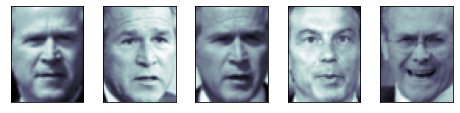

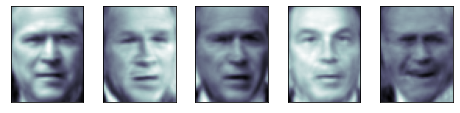

In [8]:
# Display original data and reconstructed data
plotFace(X_train, 5)
plotFace(X_train_recon, 5)

Let's calculate the reconstruction error as the Root Mean Square Error (RMSE):
\begin{equation}
    RMSE= \sqrt{\frac{1}{N} \sum_{i=1}^N (\mathbf{x}_i-\mathbf{x}'_i)^2}
\end{equation}
where $\mathbf{x}_i$ and $\mathbf{x}'_i$ denote the original and reconstructed image vectors. 



In [9]:
def get_rmse(original, reconstructed):
    return np.sqrt(((original - reconstructed) ** 2).mean())

In [10]:
# for train-set
X_train_pca = pca.transform(X_train)
X_train_recon = pca.inverse_transform(X_train_pca)
print ("RMSE reconstruction:", get_rmse(X_train, X_train_recon))

RMSE reconstruction: 10.438467


In [11]:
# for test-set
X_test_pca = pca.transform(X_test)
X_test_recon = pca.inverse_transform(X_test_pca)
print ("RMSE reconstruction:", get_rmse(X_test, X_test_recon))

RMSE reconstruction: 12.706452


### Optimal n_components

Plot the RMSE for reconstruction as a function of the number of PCs for $1\leq n\_components\leq 500$.

In [12]:
train_rmse = []
test_rmse = []
for n_components in range(1, 500, 10):
  print(n_components, end=' ')
  pca = PCA(n_components=n_components, whiten=True)
  pca.fit(X_train)  

  X_train_recon = pca.inverse_transform(pca.transform(X_train))
  train_rmse.append(get_rmse(X_train, X_train_recon))

  X_test_recon = pca.inverse_transform(pca.transform(X_test))
  test_rmse.append(get_rmse(X_test, X_test_recon))



1 11 21 31 41 51 61 71 81 91 101 111 121 131 141 151 161 171 181 191 201 211 221 231 241 251 261 271 281 291 301 311 321 331 341 351 361 371 381 391 401 411 421 431 441 451 461 471 481 491 

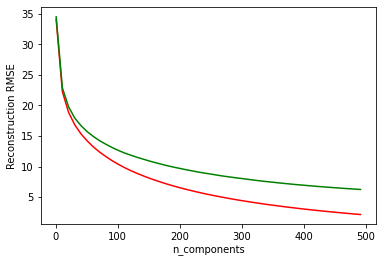

In [13]:
n_components = list(range(1, 500, 10))
plt.plot(n_components, train_rmse, 'r-', n_components, test_rmse, 'g-')
plt.xlabel('n_components')
plt.ylabel('Reconstruction RMSE')
plt.show()

## ToDo: Implement PCA

Now, implement PCA from the scratch. For this section, you are not allowed to use scikit-learn library, but feel free to leverage NumPy. Use 100 principal components (eigenfaces) to have a fair comparison with previous section.

### ToDo: Fit a PCA model

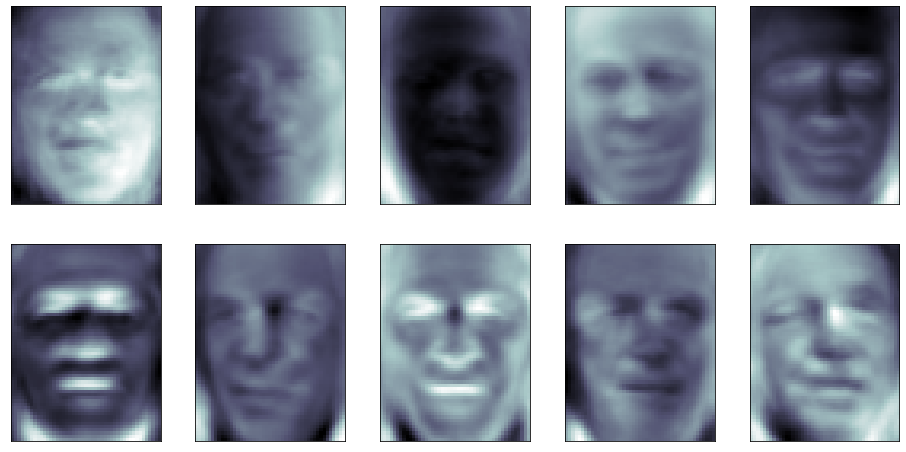

In [14]:
n_components = 100 
# ToDo: Normalize the data
mean = np.mean(X_train, axis=0)
x = X_train - mean
# ToDo: Calculate the covariance matrix
covar_matrix = np.cov(x, rowvar=False)
  
# ToDo: Calculate the eigenvalues and eigenvectors
eig_vals, eig_vectors = np.linalg.eigh(covar_matrix)
# ToDo: Sort the eigenvectors
index_sorted = np.argsort(eig_vals)[::-1]
eig_vectors = eig_vectors[:, index_sorted]
#print(eig_vectors.shape) # (2914,2914)

# ToDo: Plot the top-10 most significant eigenfaces
eig_vectors = eig_vectors[:, :n_components]
eig_vectors.shape # (2914, 100)


#pca.components_.shape # (100, 2914)
to_plot = eig_vectors.T
#to_plot.shape

fig = plt.figure(figsize=(16, 8))
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(to_plot[i].reshape([h,w]), cmap=plt.cm.bone)

In [15]:
to_plot.shape

(100, 2914)

### ToDo: PCA Transform

RMSE reconstruction Training Set: 10.409748065476576

RMSE reconstruction Testing Set: 12.673053508578718



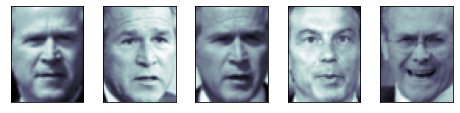

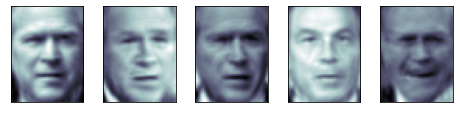

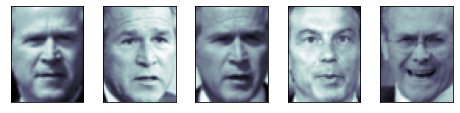

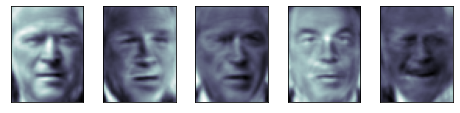

In [16]:
# ToDo: Project the data onto the top-100 principal components
projected_x = np.dot(x, eig_vectors)

# ToDo: Reconstruct the data to the original space
reconstructed_x = np.dot(projected_x, eig_vectors.T)

# ToDo: Calculate the reconstruction RMSE for train-set and test-set
print("RMSE reconstruction Training Set:", get_rmse(x, reconstructed_x)) # RMSE reconstruction: 10.43926886845739 or 10.46271179473774
print()

### need to do that for test as well PCA fit and transform
x_test = X_test - mean
projected_x_test = np.dot(x_test, eig_vectors)
reconstructed_x_test = np.dot(projected_x_test, eig_vectors.T) 

print("RMSE reconstruction Testing Set:", get_rmse(x_test, reconstructed_x_test)) 
print()
# print("RMSE reconstruction:", get_rmse(X_train, reconstructed_x))  

# ToDo: Compare your results with PCA from scikit-learn
# Scikit-learn faces 
pca = PCA(n_components=100, whiten=True) # redo these for 100 components for fair comparison
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_train_recon = pca.inverse_transform(X_train_pca)
# scikitlearn PCA faces
plotFace(X_train, 5)
plotFace(X_train_recon, 5)
# my PCA implementation faces
plotFace(X_train, 5)
plotFace(reconstructed_x, 5)

One thing we can mention here is that comparing my PCA results with the PCA from Scikit-learn gives very similar results. We can see the Root Mean Square Error (RMSE) values for the training set and testing set are the same. RMSE training for Scikit-learn is around 10.42 and and RMSE testing for Scikit-learn is around 12.70, which is almost identical to my PCA results with RMSE training of 10.40 and RMSE testing of 12.70. 

In [17]:
# plotFace(X_train, 5)
# plotFace(reconstructed_x, 5)

In [18]:
# plotFace(X_train, 5)
# plotFace(X_train_recon, 5)

This image below is taken from the code above, where PCA with 100 `n_components` was used , and compared with the X_train. The first image shows the training training set with 100 `n_components` the original and reconstructed data with PCA. The second figure shows my implementation of the PCA on the training data again, so original data vs reconstructed data from my PCA of 100 `n_components`. 

Figure 1:

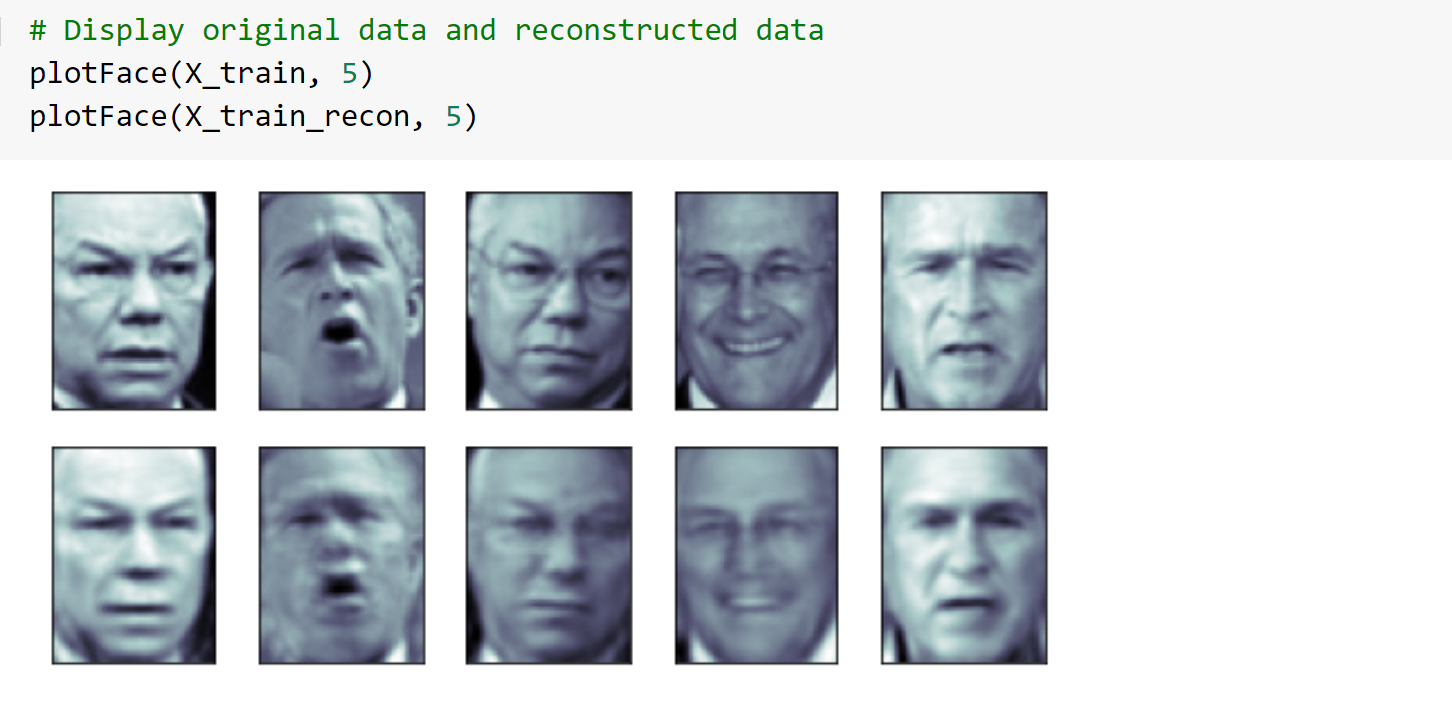

Figure 2:

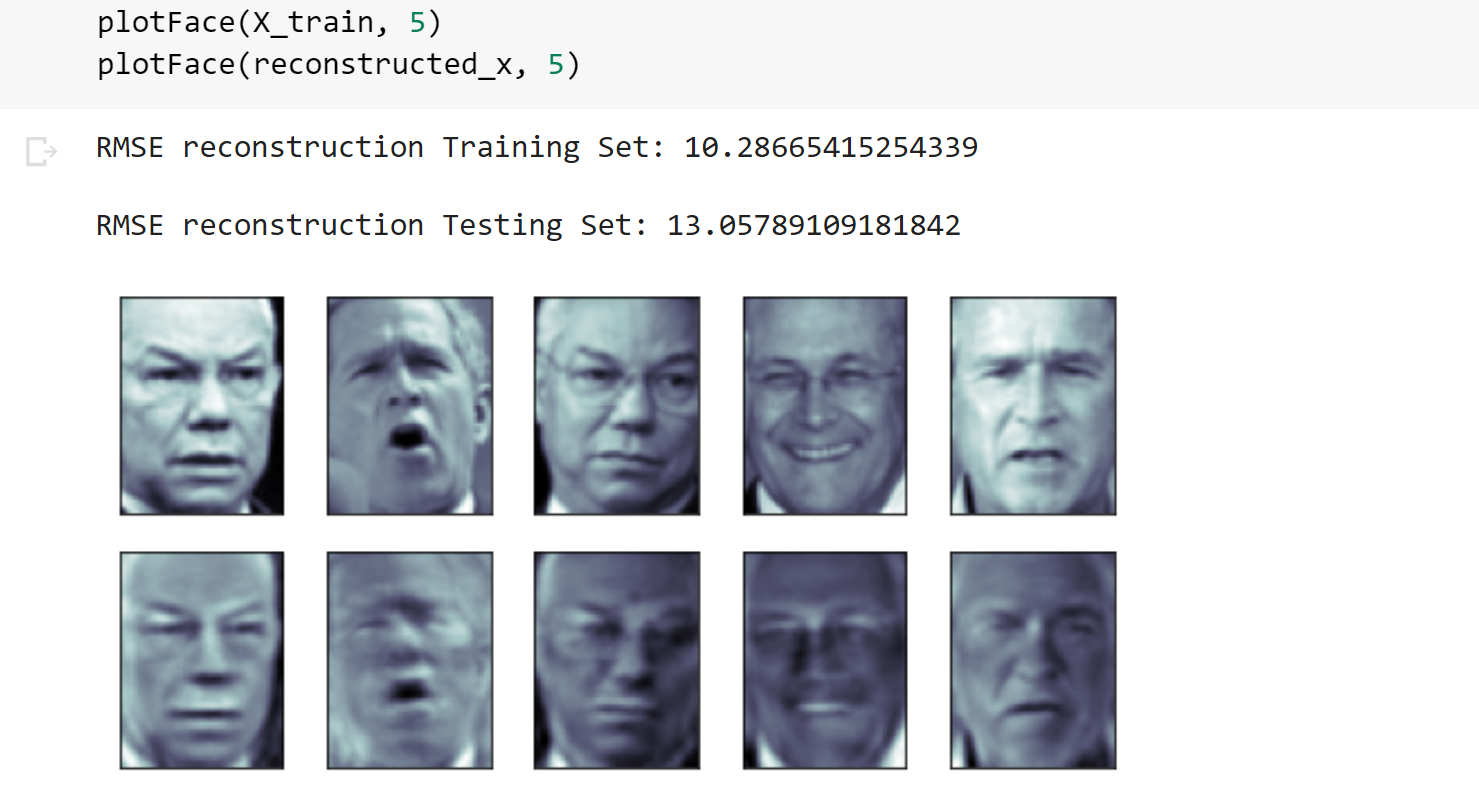

# K-Nearest Neighbors (KNN) - 5 points
In this section, you will use the KNN algorithm to classify the PCA-transformed images.


## ToDo: Fit a KNN classifier
Import the KNN classifier from scikit-learn and fit it on the PCA-transformed training data.

You can use either scikit-learn PCA, or the one that you implemented.

In [19]:
# ToDo: Import the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
# ToDo: Fit the classifier
classifier = KNeighborsClassifier(n_neighbors = 5)
pca = PCA(n_components = 100, whiten=True)
pca.fit(X_train)
print ("Finished training PCA on %d samples for 100 components." % (X_train.shape[0]))

# PCA transformation
X_train_pca = pca.transform(X_train)
classifier.fit(X_train_pca, y_train)
X_test_pca = pca.transform(X_test)

Finished training PCA on 798 samples for 100 components.


In [20]:
# # PCA transformation
# X_train_pca = pca.transform(X_train)
# classifier.fit(X_train_pca, y_train)
# X_test_pca = pca.transform(X_test)

## ToDo: Evaluate the classifier performance
Report the classification results, (accuracy, precision, recall, f1-score), and plot the confusion matrix. Do this for both your train-set and test-set.

[[141   2  14   0   7]
 [  4  52  27   0   0]
 [  3   3 365   0   1]
 [  2   3  25  43   6]
 [  0   0  16   3  81]]

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       164
           1       0.87      0.63      0.73        83
           2       0.82      0.98      0.89       372
           3       0.93      0.54      0.69        79
           4       0.85      0.81      0.83       100

    accuracy                           0.85       798
   macro avg       0.88      0.76      0.81       798
weighted avg       0.86      0.85      0.85       798

[[ 48   2  19   0   3]
 [  1  19  18   0   0]
 [  5   7 145   0   1]
 [  3   2  11  12   2]
 [  1   2  18   1  22]]

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        72
           1       0.59      0.50      0.54        38
           2       0.69      0.92      0.79       158
           3       0.92      0.40      0.56        30
      

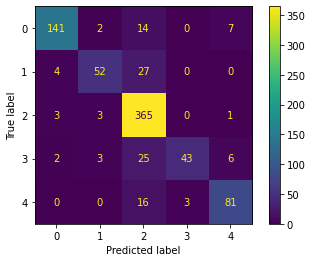

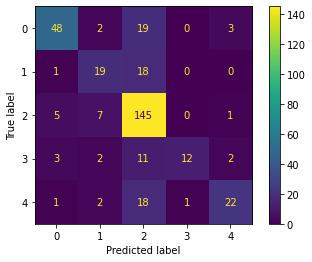

In [21]:
# ToDO: Derive the predictions using classifier
y_hat_train = classifier.predict(X_train_pca)
y_hat_test = classifier.predict(X_test_pca)

# import the sklearn packages for confusion matrix 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC

# ToDo: Report accuracy, precision, recall, and f1-score for train-set
cm_train = confusion_matrix(y_train, y_hat_train)
cm_train_report = classification_report(y_train, y_hat_train)
print(cm_train)
print()
print(cm_train_report)

# ToDo: Report accuracy, precision, recall, and f1-score for test-set
cm_test = confusion_matrix(y_test, y_hat_test)
cm_test_report = classification_report(y_test, y_hat_test)
print(cm_test)
print()
print(cm_test_report)

# ToDo: Plot the confusion matrix for train-set and test-set
disp = ConfusionMatrixDisplay(confusion_matrix = cm_train)#, display_labels=clf.classes_)
print('Confusion Matrix Plot for Training (First Plot) and Testing (Second Plot)')
disp.plot()
disp2 = ConfusionMatrixDisplay(confusion_matrix = cm_test)#, display_labels=clf.classes_)
disp2.plot()
plt.show()

In [24]:
#cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = lfw_dataset.target_names)
# print('Confusion Matrix Plot for Training (First Plot) and Testing (Second Plot)')
# disp.plot()
# disp2 = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = lfw_dataset.target_names)
# disp2.plot()
# plt.show()